## Problem 2.24

In [1]:
# TODO: Add your imports
import numpy as np
import matplotlib.pyplot as plt

### 2.24 (B)

In [24]:
def target_function(x):
    # TODO: implement target function
    return x**2

In [25]:
def generate_data(N):
    # generate data set of size N for uniform distribution in [-1,1]
    return np.random.uniform(-1,1,(N,2))

In [26]:
def create_hypothesis(x1,y1,x2,y2):
    # create hypothesis function for two points
    m = (y2-y1)/(x2-x1)
    b = y1 - m*x1
    return m,b

In [27]:
def run_numerical_experiment(x_train , x_test , y_train , y_test):
    # TODO: implement experiment
    g_ = (0,0)
    e_out = 0
    hypothesis_list = []
    for i in range(len(x_train)):
        m,b = create_hypothesis(x_train[i][0],y_train[i][0],x_train[i][1],y_train[i][1])
        hypothesis_list.append((m,b))
        predicted = m*x_test + b
        error = np.mean((predicted-y_test)**2)
        e_out += error
        g_ = (g_[0]+m,g_[1]+b)

    g_ = (g_[0]/len(x_train),g_[1]/len(x_train))
    e_out = e_out/len(x_train)
    return g_,e_out,hypothesis_list

### 2.24 (C)

In [28]:
# TODO: Run experiment and calculate bias and variance (+ plotting)
training_set_size = 100000
test_set_size = 1000

x_train = generate_data(training_set_size)
x_test = generate_data(test_set_size)

y_train = target_function(x_train)
y_test = target_function(x_test)

g_,e_out,hypothesis_list = run_numerical_experiment(x_train,x_test,y_train,y_test)

# bias = E[(g_bar(x) - f(x))**2]
predicted = g_[0]*x_test+g_[1]
bias = np.mean((predicted-y_test)**2)
print(f"Bias = {bias}")
# variance = E[(g_bar(x) - g(x))**2]
variace =  np.mean([np.mean((g[0]*x_test+g[1]-predicted)**2) for g in hypothesis_list])
print(f"Variance = {variace}")
print(f"Expected error (bias + variace) = {bias+variace}")
print(f"Out of sample error = {e_out}")

Bias = 0.21492052854647675
Variance = 0.3450523211881304
Expected error (bias + variace) = 0.5599728497346071
Out of sample error = 0.5599728497346042


Note that Eout is nearly the same as (bias + variance)

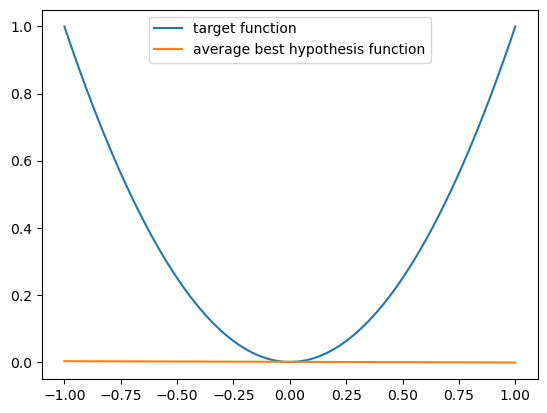

In [7]:
# plot the target function and the hypothesis function
x = np.linspace(-1,1,1000)
y = target_function(x)
plt.plot(x,y)
y = g_[0] * x + g_[1]
plt.plot(x,y)
plt.legend(['target function' , 'average best hypothesis function'])
plt.show()

### 2.24 (E)
Repeat (b) and (c) for a constant hypothesis function (h(x) = c), where c is the average value of
the input data points. Repeat the experiment for a different number of input data points (2, 5, 10
and 20). Compare 𝐸_𝑜𝑢𝑡 with bias + var and provide a plot of your 𝑔(𝑥) and 𝑓(𝑥) (on the same plot) for each number. Comment on your results

In [13]:
def create_mean_hypothesis(x):
    return np.mean(x)

In [14]:
def run_numerical_experiment2(x_train , x_test , y_train , y_test):
    g_ = 0
    e_out = 0
    hypothesis_list = []
    for i in range(len(x_train)):
        c = create_mean_hypothesis(y_train[i])
        hypothesis_list.append(c)
        error = np.mean((c-y_test)**2)
        e_out += error
        g_ += c
        
    g_ = g_/len(x_train)
    e_out = e_out/len(x_train)
    return g_,e_out,hypothesis_list

In [31]:
def generate_data2(N,d):
    # generate data set of size N for uniform distribution in [-1,1]
    data_set = np.random.uniform(-1,1,(N,d))
    data_set = np.sort(data_set , axis=1)
    return data_set

Running experiment for d = 2
Bias = 0.08831351064913279
Variance = 0.04456318354263822
Expected error (bias + variace) = 0.132876694191771
Out of sample error = 0.1328766941917702


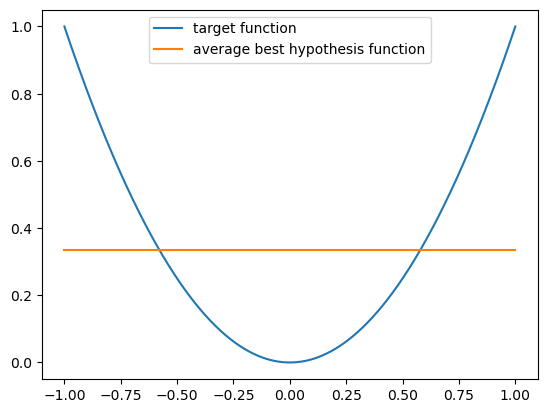

Running experiment for d = 5
Bias = 0.08899268559774459
Variance = 0.017909580527865426
Expected error (bias + variace) = 0.10690226612561002
Out of sample error = 0.10690226612560991


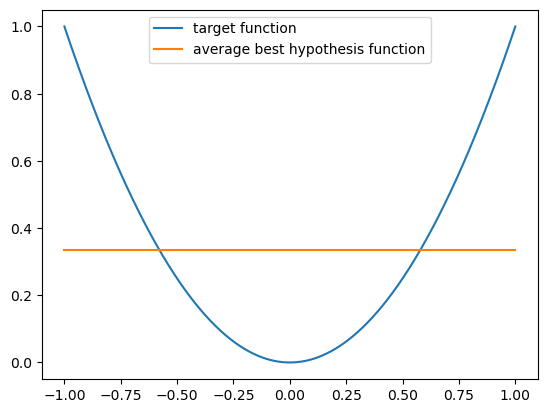

Running experiment for d = 10
Bias = 0.08866583211873798
Variance = 0.008901493998822807
Expected error (bias + variace) = 0.09756732611756079
Out of sample error = 0.09756732611756105


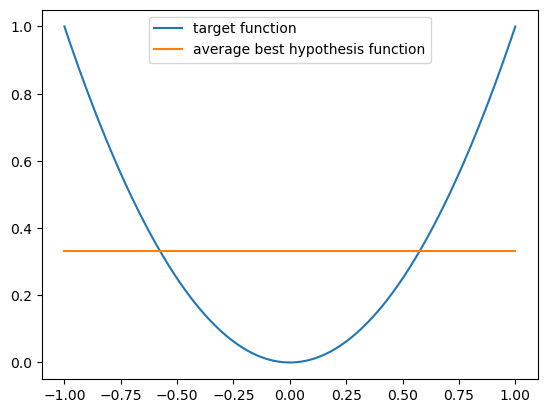

Running experiment for d = 20
Bias = 0.08834279244341069
Variance = 0.004452809530976323
Expected error (bias + variace) = 0.09279560197438701
Out of sample error = 0.0927956019743861


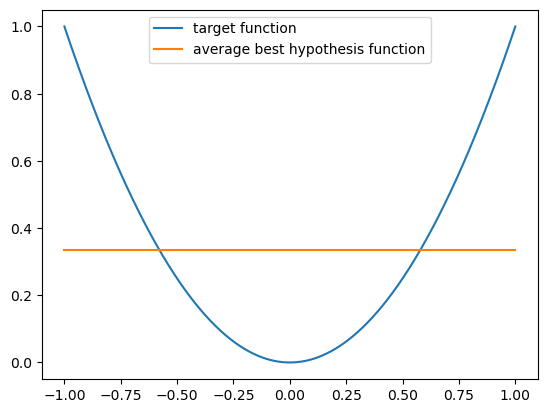

In [34]:
# TODO: Run experiment for quadratic hypothesis
for d in [2,5,10,20]:
    print(f"Running experiment for d = {d}")
    x_train_2 = generate_data2(training_set_size,d)
    x_test_2 = generate_data2(test_set_size,d)

    y_train_2 = target_function(x_train_2)
    y_test_2 = target_function(x_test_2)

    g_2,e_out_2,hypothesis_list_2 = run_numerical_experiment2(x_train_2,x_test_2,y_train_2,y_test_2)

    # bias = E[(g_bar(x) - f(x))**2]
    bias_2 = np.mean((g_2 - y_test_2)**2)
    print(f"Bias = {bias_2}")
    # variance = E[(g_bar(x) - g(x))**2]
    variace_2 =  np.mean([(g - g_2)**2 for g in hypothesis_list_2])
    print(f"Variance = {variace_2}")
    print(f"Expected error (bias + variace) = {bias_2+variace_2}")
    print(f"Out of sample error = {e_out_2}")

    # plot the target function and the hypothesis function
    x = np.linspace(-1,1,1000)
    y = target_function(x)
    plt.plot(x,y)
    y = g_2 * np.ones(1000)
    plt.plot(x,y)
    plt.legend(['target function' , 'average best hypothesis function'])
    plt.show()


### Conclusion
<ul>
<li>Eout approximatatly equals to bias + variance</li>
<li>The bias almost always remains the same and don't change with the increase of N.</li>
<li>The variance decreases with the increase of n. </li>
<li>The varinace is smaller than the bias due to the fact that the hypothesis function is not complex.</li>
</ul>